import libraries

In [1]:
import pandas as pd
import re
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

mount google drive ( for dataset files)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cleaned_df = pd.read_csv('/content/drive/My Drive/datasets/cleaned_df.csv', encoding = "ISO-8859-1" , error_bad_lines = False)

In [4]:
cleaned_df.head()

,text,label,lemmatized,final_text
0,awww that a bummer you shoulda got david ca...,0,awww that a bummer you shoulda got david carr ...,"['awww', 'bummer', 'shoulda', 'got', 'david', ..."
1,is upset that he can t update his facebook by ...,0,is upset that he can t update his facebook by ...,"['upset', 'update', 'facebook', 'texting', 'mi..."
2,i dived many times for the ball managed to sa...,0,i dived many time for the ball managed to save...,"['dived', 'many', 'time', 'ball', 'managed', '..."
3,my whole body feels itchy and like its on fire,0,my whole body feel itchy and like it on fire,"['whole', 'body', 'feel', 'itchy', 'like', 'fi..."
4,no it not behaving at all i mad why am i he...,0,no it not behaving at all i mad why am i here ...,"['behaving', 'mad', 'see']"


In [5]:
cleaned_df.shape

(1600000, 4)

In [6]:
cleaned_df.dtypes

text          object
label          int64
lemmatized    object
final_text    object
dtype: object

In [7]:
cleaned_df['text']= cleaned_df["text"].astype(str) 

lets check if empty strings

In [9]:
toDropIndices = []
for ind in cleaned_df.index:
  if (cleaned_df['text'][ind]) == 'nan':
    print('deleting', ind, cleaned_df['text'][ind])
    toDropIndices.append(ind)

deleting 208 nan
deleting 249 nan
deleting 398 nan
deleting 430 nan
deleting 1011 nan
deleting 1014 nan
deleting 1231 nan
deleting 1421 nan
deleting 1486 nan
deleting 1641 nan
deleting 2898 nan
deleting 4377 nan
deleting 6058 nan
deleting 6419 nan
deleting 7840 nan
deleting 8838 nan
deleting 9072 nan
deleting 9556 nan
deleting 9599 nan
deleting 10625 nan
deleting 11820 nan
deleting 12110 nan
deleting 12674 nan
deleting 13232 nan
deleting 14470 nan
deleting 15679 nan
deleting 16342 nan
deleting 16803 nan
deleting 17071 nan
deleting 17433 nan
deleting 18048 nan
deleting 18375 nan
deleting 18796 nan
deleting 19267 nan
deleting 19445 nan
deleting 19833 nan
deleting 20870 nan
deleting 23108 nan
deleting 23116 nan
deleting 24397 nan
deleting 25293 nan
deleting 25704 nan
deleting 26291 nan
deleting 26481 nan
deleting 28855 nan
deleting 28898 nan
deleting 28961 nan
deleting 30563 nan
deleting 31350 nan
deleting 31403 nan
deleting 32313 nan
deleting 37280 nan
deleting 37614 nan
deleting 37805 n

In [10]:
print(len(toDropIndices))

2757


In [11]:
cleaned_df.drop(cleaned_df.index[toDropIndices], inplace=True)

In [12]:
cleaned_df.shape

(1597243, 4)

In [13]:
cleaned_df['label'] = cleaned_df['label'].map({4: 1, 0: 0})

In [14]:
cleaned_df.to_csv('drive/My Drive/datasets/cleaned_df_2.csv', index=False)

In [99]:
cleaned_df = pd.read_csv('drive/My Drive/datasets/cleaned_df_2.csv')
cleaned_df.tail()

,text,label,lemmatized,final_text
1597238,just woke up having no school is the best fee...,1,just woke up having no school is the best feel...,"['woke', 'school', 'best', 'feeling', 'ever']"
1597239,thewdb com very cool to hear old walt interv...,1,thewdb com very cool to hear old walt intervie...,"['thewdb', 'com', 'cool', 'hear', 'old', 'walt..."
1597240,are you ready for your mojo makeover ask me f...,1,are you ready for your mojo makeover ask me fo...,"['ready', 'mojo', 'makeover', 'ask', 'detail']"
1597241,happy 38th birthday to my boo of alll time ...,1,happy 38th birthday to my boo of alll time tup...,"['happy', '38th', 'birthday', 'boo', 'alll', '..."
1597242,happy charitytuesday,1,happy charitytuesday,"['happy', 'charitytuesday']"


lte's take only a subset of them to train (40000)

In [100]:
positive_df = cleaned_df[cleaned_df['label']==1]
positive_df.shape

(798660, 4)

In [101]:
positive_sliced = positive_df[0:40000]
print(positive_sliced.shape)
positive_sliced.reset_index(inplace=True, drop=True)
positive_sliced.head()

(40000, 4)


,text,label,lemmatized,final_text
0,i love u guys r the best,1,i love u guy r the best,"['love', 'u', 'guy', 'r', 'best']"
1,im meeting up with one of my besties tonight ...,1,im meeting up with one of my besties tonight c...,"['im', 'meeting', 'one', 'besties', 'tonight',..."
2,thanks for the twitter add sunisa i got to m...,1,thanks for the twitter add sunisa i got to mee...,"['thanks', 'twitter', 'add', 'sunisa', 'got', ..."
3,being sick can be really cheap when it hurts t...,1,being sick can be really cheap when it hurt to...,"['sick', 'really', 'cheap', 'hurt', 'much', 'e..."
4,he has that effect on everyone,1,he ha that effect on everyone,"['ha', 'effect', 'everyone']"


In [102]:
negative_df = cleaned_df[cleaned_df['label']==0]
negative_df.shape

(798583, 4)

In [103]:
negative_sliced = negative_df[0:40000]
print(negative_sliced.shape)
negative_sliced.reset_index(inplace=True, drop=True)
negative_sliced.head()

(40000, 4)


,text,label,lemmatized,final_text
0,awww that a bummer you shoulda got david ca...,0,awww that a bummer you shoulda got david carr ...,"['awww', 'bummer', 'shoulda', 'got', 'david', ..."
1,is upset that he can t update his facebook by ...,0,is upset that he can t update his facebook by ...,"['upset', 'update', 'facebook', 'texting', 'mi..."
2,i dived many times for the ball managed to sa...,0,i dived many time for the ball managed to save...,"['dived', 'many', 'time', 'ball', 'managed', '..."
3,my whole body feels itchy and like its on fire,0,my whole body feel itchy and like it on fire,"['whole', 'body', 'feel', 'itchy', 'like', 'fi..."
4,no it not behaving at all i mad why am i he...,0,no it not behaving at all i mad why am i here ...,"['behaving', 'mad', 'see']"


In [104]:
cleaned_df = negative_sliced.append(positive_sliced)
cleaned_df.shape

(80000, 4)

shuffle

In [105]:
from sklearn.utils import shuffle
cleaned_df = shuffle(cleaned_df)
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.tail(5)

,text,label,lemmatized,final_text
79995,missin alla ya ll too go to bed so we can ...,0,missin alla ya ll too go to bed so we can quot...,"['missin', 'alla', 'ya', 'go', 'bed', 'quot', ..."
79996,im doing some coursework media again,0,im doing some coursework medium again,"['im', 'coursework', 'medium']"
79997,big hugs to who not feeling well today,0,big hug to who not feeling well today,"['big', 'hug', 'feeling', 'well', 'today']"
79998,did i really just put partyboy911 wow dyla...,1,did i really just put partyboy911 wow dylanlive,"['really', 'put', 'partyboy911', 'wow', 'dylan..."
79999,it not so bad just kinda throbby,1,it not so bad just kinda throbby,"['bad', 'kinda', 'throbby']"


Now cleaned_df contains 80000 entries i.e. the one we'll use to train

In [106]:
cleaned_df.to_csv('drive/My Drive/datasets/cleaned_df_3.csv', index=False)

In [107]:
cleaned_df = pd.read_csv('drive/My Drive/datasets/cleaned_df_3.csv')
cleaned_df.tail()

,text,label,lemmatized,final_text
79995,missin alla ya ll too go to bed so we can ...,0,missin alla ya ll too go to bed so we can quot...,"['missin', 'alla', 'ya', 'go', 'bed', 'quot', ..."
79996,im doing some coursework media again,0,im doing some coursework medium again,"['im', 'coursework', 'medium']"
79997,big hugs to who not feeling well today,0,big hug to who not feeling well today,"['big', 'hug', 'feeling', 'well', 'today']"
79998,did i really just put partyboy911 wow dyla...,1,did i really just put partyboy911 wow dylanlive,"['really', 'put', 'partyboy911', 'wow', 'dylan..."
79999,it not so bad just kinda throbby,1,it not so bad just kinda throbby,"['bad', 'kinda', 'throbby']"


In [108]:
distribution = cleaned_df['label'].value_counts().to_frame()
# print(distribution)
distribution.head()

,label
1,40000
0,40000


In [109]:
print('we have', distribution.loc[1, 'label']/distribution['label'].sum() * 100,'% positive tweets')
print('we have',distribution.loc[0, 'label']/distribution['label'].sum()*100,'% negative tweets')

we have 50.0 % positive tweets
we have 50.0 % negative tweets


In [110]:
# draw graph

In [111]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=0, 
                               stratify=cleaned_df[['label']])

In [112]:
train_df.head()

,text,label,lemmatized,final_text
59878,feeling damn sleepy after a heavy lunch also...,0,feeling damn sleepy after a heavy lunch also p...,"['feeling', 'damn', 'sleepy', 'heavy', 'lunch'..."
15305,pr msu lost it in the first ten minutes maybe...,0,pr msu lost it in the first ten minute maybe e...,"['pr', 'msu', 'lost', 'first', 'ten', 'minute'..."
28489,still doesnt really understand what this is,1,still doesnt really understand what this is,"['still', 'doesnt', 'really', 'understand']"
49579,lost her voice oh pcn i miss you,0,lost her voice oh pcn i miss you,"['lost', 'voice', 'oh', 'pcn', 'miss']"
6864,rascal flatts here comes goodbye so sad,0,rascal flatts here come goodbye so sad,"['rascal', 'flatts', 'come', 'goodbye', 'sad']"


In [113]:
train_df.shape
train_df['label'].value_counts().to_frame()

,label
1,32000
0,32000


In [114]:
test_df.head()

,text,label,lemmatized,final_text
62337,i need a sponsor to pay my race entry fees i ...,0,i need a sponsor to pay my race entry fee i ju...,"['need', 'sponsor', 'pay', 'race', 'entry', 'f..."
46390,you and i mate,1,you and i mate,['mate']
75668,what club is this sounds awesome,1,what club is this sound awesome,"['club', 'sound', 'awesome']"
57975,the phillies i am a season ticket holder ...,0,the phillies i am a season ticket holder they ...,"['phillies', 'season', 'ticket', 'holder', 'lo..."
37301,about 1 2 an hour before i bring the program t...,1,about 1 2 an hour before i bring the program t...,"['1', '2', 'hour', 'bring', 'program', 'end', ..."


In [115]:
test_df.shape
test_df['label'].value_counts().to_frame()

,label
1,8000
0,8000


hence, we have almost equal distribution of positive and negative tweets in training and test sets

Let's separate train tweets and labels, and validation tweets and labels

In [116]:
train_tweets = train_df['text']
train_labels = train_df['label']

test_tweets = test_df['text']
test_labels = test_df['label']

In [117]:
train_tweets.head()

59878    feeling damn sleepy after a heavy lunch   also...
15305    pr msu lost it in the first ten minutes  maybe...
28489          still doesnt really understand what this is
49579                   lost her voice  oh pcn  i miss you
6864            rascal flatts   here comes goodbye  so sad
Name: text, dtype: object

## PreProcessing 

In [118]:
vocab_size = 25000
embedding_dim = 16
max_length = 25
trunc_type='post'     
pad_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_tweets)    # fit tokenizer only on train tweets
word_index = tokenizer.word_index

save our tokenizer

In [119]:
with open('/content/drive/My Drive/models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

lets check out our word index

In [120]:
i = 0
for key, value in word_index.items():
  i += 1
  print(key, value)
  if i == 10:
    break

<OOV> 1
i 2
to 3
the 4
a 5
and 6
it 7
my 8
you 9
is 10


In [121]:
len(word_index)

40823

In [122]:
# training set
train_sequences = tokenizer.texts_to_sequences(train_tweets)
train_padded = pad_sequences(train_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

# test set
test_sequences = tokenizer.texts_to_sequences(test_tweets)
test_padded = pad_sequences(test_sequences,maxlen=max_length,
                            truncating=trunc_type, padding=pad_type)

train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [123]:

print('length of train sequences:',len(train_sequences))
print('length of test sequences:',len(test_sequences))
print('length of train padded:',len(train_padded))
print('length of test padded:',len(test_padded))

print()


print('train sequences:',train_sequences[:5])
print('test sequences:',test_sequences[:5])
print('train padded:', train_padded[:5])
print('test padded:', test_padded[:5])


length of train sequences: 64000
length of test sequences: 16000
length of train padded: 64000
length of test padded: 16000

train sequences: [[167, 251, 684, 145, 5, 1680, 359, 264, 849, 152, 961, 13, 5693, 147, 14, 479, 2012], [3410, 3790, 250, 7, 11, 4, 161, 2292, 594, 226, 146, 4, 161, 1222, 608], [68, 749, 61, 707, 49, 28, 10], [250, 104, 835, 87, 12086, 2, 110, 9], [6300, 7086, 84, 719, 1103, 19, 123]]
test sequences: [[2, 99, 5, 1, 3, 827, 8, 956, 3183, 16869, 2, 21, 31, 14, 233, 27, 23, 413, 2, 77, 3, 2660, 86, 4054, 20, 25, 358, 12, 4, 16869], [9, 6, 2, 1090], [49, 875, 10, 28, 309, 165], [4, 8110, 2, 54, 5, 654, 1207, 1, 81, 36, 1834, 39, 592], [55, 199, 82, 92, 376, 202, 2, 572, 4, 2210, 3, 92, 318, 48, 5, 162, 193, 12, 9]]
train padded: [[  167   251   684   145     5  1680   359   264   849   152   961    13
   5693   147    14   479  2012     0     0     0     0     0     0     0
      0]
 [ 3410  3790   250     7    11     4   161  2292   594   226   146     4
    161  1

now, we are ready to train model

A general method for graphs

In [124]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


Some demo tweets to analyse results

In [125]:
# Write some new reviews 

review1 = """I loved this movie"""

review2 = """that was the worst movie I've ever seen"""

review3 = """too much violence even for a Bond film"""

review4 = """a captivating recounting of a cherished myth"""

new_reviews = [review1, review2, review3, review4]

def predict_review(model, reviews=new_reviews):

  # 1. Create the sequences via tokenizer
  # 2. padding to be done same as training data
  padding_type='post'
  sample_sequences = tokenizer.texts_to_sequences(reviews)      # tokenize according to our tokens
  reviews_padded = pad_sequences(sample_sequences, padding=padding_type, 
                                 maxlen=max_length) 
  classes = model.predict(reviews_padded)   # gives back prediction
  for x in range(len(reviews_padded)):
    print(reviews[x])
    print(classes[x])
    print('\n')


A general method to train the given model and show graph result

In [126]:
def fit_model_and_show_results (model):
  model.summary()
  earlyStop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
  )
  history = model.fit(train_padded, train_labels_final, epochs=num_epochs, batch_size=20, validation_split = 0.4, shuffle = True,
                      validation_data=(test_padded, test_labels_final),  callbacks=[earlyStop])   # returns history(loss and accuracy)
  plot_graphs(history, "accuracy",)
  plot_graphs(history, "loss")
  predict_review(model)

# CNN

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 25, 16)            400000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 21, 16)            1296      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 401,313
Trainable params: 401,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/450
1920/1920 [==============================] - 17s 9ms/step - loss: 0.6927 - accuracy: 0.5106 - val_loss: 0.6923 - val_accuracy: 0.5240
Epoch 2/450
1920/1920 [==============================] - 16s 8ms/step - loss: 0.6916 - accuracy: 0.5

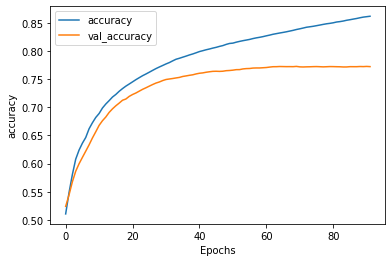

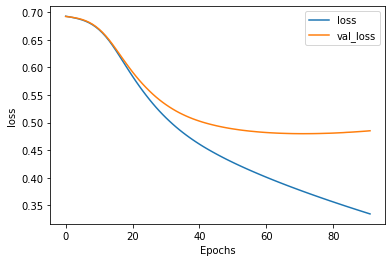

I loved this movie
[0.931649]


that was the worst movie I've ever seen
[0.1516179]


too much violence even for a Bond film
[0.62077385]


a captivating recounting of a cherished myth
[0.71691364]




In [127]:
num_epochs = 450

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.00001
model_cnn.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate), 
                  metrics=['accuracy'])

fit_model_and_show_results(model_cnn)

saving model

In [128]:
model_cnn.save('/content/drive/My Drive/models/twitter_sentiment_cnn_model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/twitter_sentiment_cnn_model/assets


checking that model

In [93]:
new_cnn_model = tf.keras.models.load_model('/content/drive/My Drive/models/twitter_sentiment_cnn_model')

# Check its architecture
new_cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 25, 16)            240000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 16)            1296      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 241,313
Trainable params: 241,313
Non-trainable params: 0
_________________________________________________________________


# Bidirectional LSTM 1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 16)            240000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 244,257
Trainable params: 244,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
480/480 [==============================] - 10s 21ms/step - loss: 0.6930 - accuracy: 0.5084 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 2/30
480/480 [==============================] - 9s 19ms/step - loss: 0.6925 - accuracy: 0.5476 - val_loss: 0.6923 - val_accuracy: 0.5425
Epoch 3/30
480/480 [==============================] - 9s 19ms/step - loss: 0.6918 - accurac

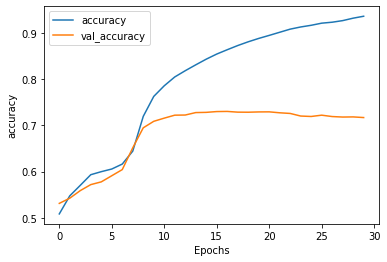

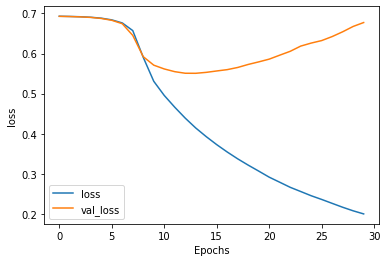

I loved this movie
[0.9145067]


that was the worst movie I've ever seen
[0.07736091]


too much violence even for a Bond film
[0.0592267]


a captivating recounting of a cherished myth
[0.8148071]




In [85]:
num_epochs = 80

model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.00003
model_bidi_lstm.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate),
                        metrics=['accuracy'])
fit_model_and_show_results(model_bidi_lstm)

In [86]:
model_bidi_lstm.save('/content/drive/My Drive/models/twitter_sentiment_bidi_lstm_model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/twitter_sentiment_bidi_lstm_model/assets


In [87]:
new_bidi_lstm_model = tf.keras.models.load_model('/content/drive/My Drive/models/twitter_sentiment_bidi_lstm_model')

In [88]:
new_bidi_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 16)            240000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 244,257
Trainable params: 244,257
Non-trainable params: 0
_________________________________________________________________


# multiple Bidirectional LSTM (2 layers)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 25, 16)            240000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 25, 32)            4224      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 250,529
Trainable params: 250,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
480/480 [==============================] - 18s 37ms/step - loss: 0.6927 - accuracy: 0.5259 - val_loss: 0.6910 - val_accuracy: 0.5470
Epoch 2/80
480/480 [==============================] - 16s 34ms/step - loss: 0.6168 - accuracy: 0.6587 

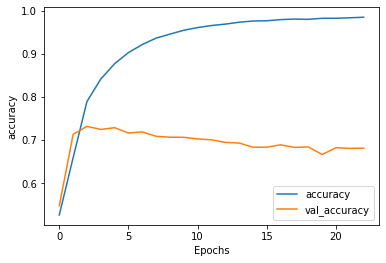

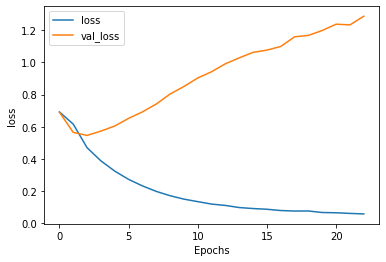

I loved this movie
[0.9915234]


that was the worst movie I've ever seen
[0.00952811]


too much violence even for a Bond film
[0.01221069]


a captivating recounting of a cherished myth
[0.05981187]




In [89]:
num_epochs = 80

model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.0001
model_multiple_bidi_lstm.compile(loss='binary_crossentropy',
                        optimizer=tf.keras.optimizers.Adam(learning_rate),
                        metrics=['accuracy'])

fit_model_and_show_results(model_multiple_bidi_lstm)

In [90]:
model_multiple_bidi_lstm.save('/content/drive/My Drive/models/twitter_sentiment_multiple_bidi_lstm')

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/twitter_sentiment_multiple_bidi_lstm/assets
